# Project: Investigate a Dataset - [noshowappointments-kagglev2-may-2016.csv] 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

### Dataset Description 
we Have a  file contains the data we are going to analyze

### Question(s) for Analysis
What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?

In [3]:
#import statmentes for all of the packeges that we plan to use 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Rember to include a 'Magic word' so that your visualzation are plotted
#inline with the notebook.see this page for more:
#http://ipython.readhedocs.io/en/stuble/interactive/magic.html
%matplotlib inline

In [9]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.3MB/s eta 0:00:01  5% |█▉                              | 593kB 62.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 3.6MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling
 In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties


In [19]:
import pandas as pd

# Load your data from 'noshowappointments-kagglev2-may-2016.csv' and print out the first few rows
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
#exploring the data shape
df.shape

(110527, 14)

The data have 110527rows and 14 columns

In [21]:
#check foe duplication
df.duplicated().sum()

0

There is 0 duplication

In [22]:
# Check the number of unique values in the id  
df['PatientId'].nunique()

62299

There is 62299 is unique values 

In [23]:
#check for duplications id 
df['PatientId'].duplicated().sum()

48228

There is 48228 duplicated PatientId

### Data Cleaning

In [24]:
#getting some information about your data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [25]:
#identify the row index -1 for the Age 
mask=df.query('Age=="-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [26]:
#remove the -1 value 
df.drop(index=99832)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [20]:
# inspection for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
 No missing values

In [53]:
#correction the coulmens name
df.rename(columns={'Hipertension': 'Hypertension'})
df.rename(columns={'No-show': 'No_show'})

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,19,CONQUISTA,0,0,0,0,0,0,No


In [43]:
df.drop_duplicates(subset=['PatientId', 'No-show'])
df.shape

(110527, 14)

In [49]:
# removing unnecessary data
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> Now that you've prepared and refined your dataset, it's time to delve into exploration. Begin by calculating statistical measures and crafting graphical representations, all aimed at addressing the research inquiries you introduced in the initial section of your analysis





### Analysis

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2ffafea58>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x7fb2ff8de630>]], dtype=object),)

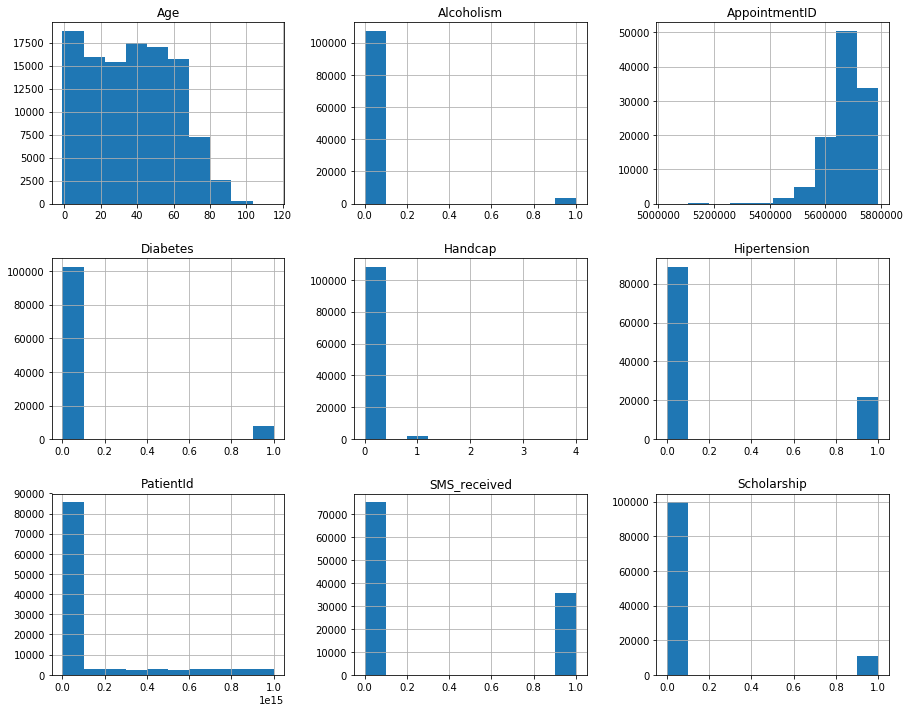

In [42]:
#histogram of whole data
df.hist(figsize=(15,12)),

In [44]:
# Assigning name of show and no show facilitate recall 
# DataFrame for 'No' and 'Yes' in the 'No-show' column
show = df['No-show'] == 'No'
noshow = df['No-show'] == 'Yes'
df[show].count(),df[noshow].count()

(PatientId         88208
 AppointmentID     88208
 Gender            88208
 ScheduledDay      88208
 AppointmentDay    88208
 Age               88208
 Neighbourhood     88208
 Scholarship       88208
 Hipertension      88208
 Diabetes          88208
 Alcoholism        88208
 Handcap           88208
 SMS_received      88208
 No-show           88208
 dtype: int64, PatientId         22319
 AppointmentID     22319
 Gender            22319
 ScheduledDay      22319
 AppointmentDay    22319
 Age               22319
 Neighbourhood     22319
 Scholarship       22319
 Hipertension      22319
 Diabetes          22319
 Alcoholism        22319
 Handcap           22319
 SMS_received      22319
 No-show           22319
 dtype: int64)

The No show  is  88208 biger than no-show  22319

### Analysing 

Text(0,0.5,'patients number')

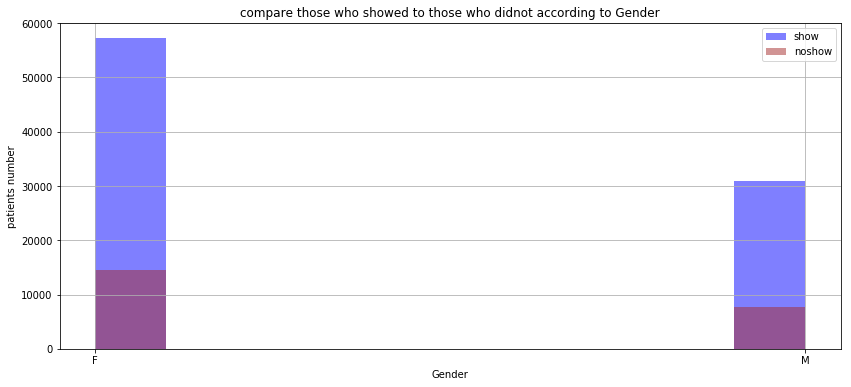

In [68]:
import matplotlib.pyplot as plt  # Import the matplotlib library
# compare those who showed to those who didnot according to Gender

plt.figure(figsize=(14, 6))
df.Gender[show].hist(alpha=0.5,color='blue',label='show')
df.Gender[noshow].hist(alpha=0.5,color='brown',label='noshow')
plt.legend();
plt.title('compare those who showed to those who didnot according to Gender')
plt.xlabel('Gender')
plt.ylabel('patients number')

In [69]:
# compare those who showed to those who didnot according to Gender

print(df.Gender[show].value_counts())
print(df.Gender[noshow].value_counts())

F    57246
M    30962
Name: Gender, dtype: int64
F    14594
M     7725
Name: Gender, dtype: int64


Gender is negligible famale are more than meale

Text(0,0.5,'patients number')

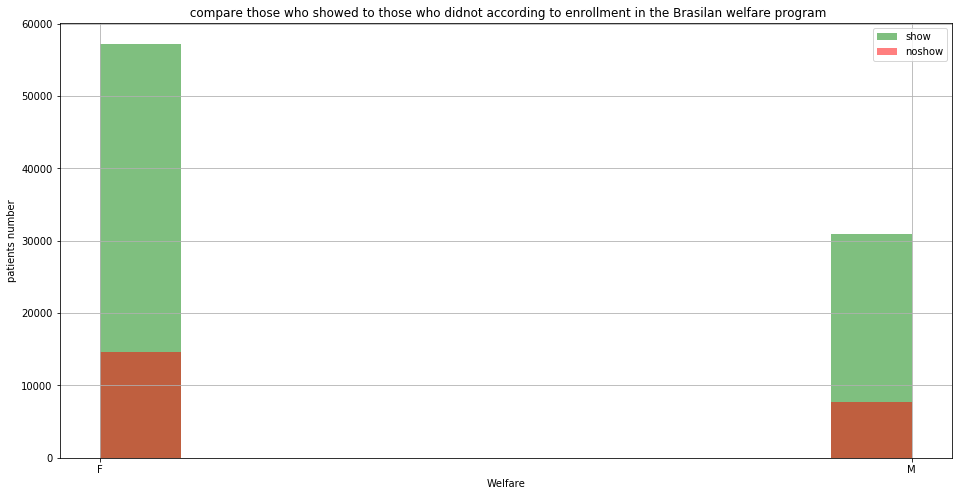

In [80]:
import matplotlib.pyplot as plt  # Import the matplotlib library
# compare those who showed to those who didnot according to enrollment in the Brasilan Welfare program

plt.figure(figsize=(16, 8))
df.Gender[show].hist(alpha=0.5,color='green',label='show')
df.Gender[noshow].hist(alpha=0.5,color='red',label='noshow')
plt.legend();
plt.title(' compare those who showed to those who didnot according to enrollment in the Brasilan welfare program')
plt.xlabel('Welfare')
plt.ylabel('patients number')

In [81]:
#compare those who showed to those who didnot according to gender
print(df.Scholarship[show].value_counts())
print(df.Scholarship[noshow].value_counts())

0    79925
1     8283
Name: Scholarship, dtype: int64
0    19741
1     2578
Name: Scholarship, dtype: int64


  enrollment in the Brasilan welfare program is negligible

Text(0,0.5,'patients number')

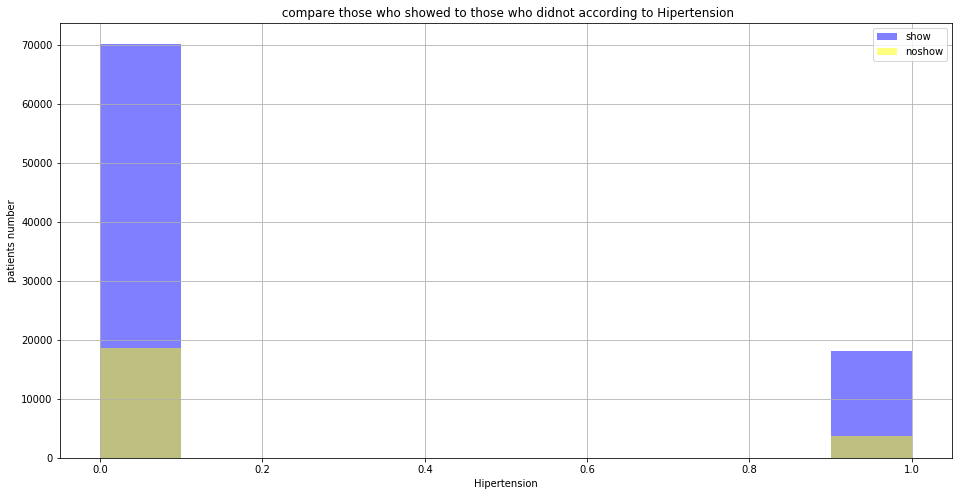

In [84]:
import matplotlib.pyplot as plt  # Import the matplotlib library
#compare those who showed to those who didnot according to Hypertension

plt.figure(figsize=(16, 8))
df.Hipertension[show].hist(alpha=0.5,color='blue',label='show')
df.Hipertension[noshow].hist(alpha=0.5,color='yellow',label='noshow')
plt.legend();
plt.title(' compare those who showed to those who didnot according to Hipertension')
plt.xlabel('Hipertension')
plt.ylabel('patients number')

 Hypertension is negligible

Text(0,0.5,'patients number')

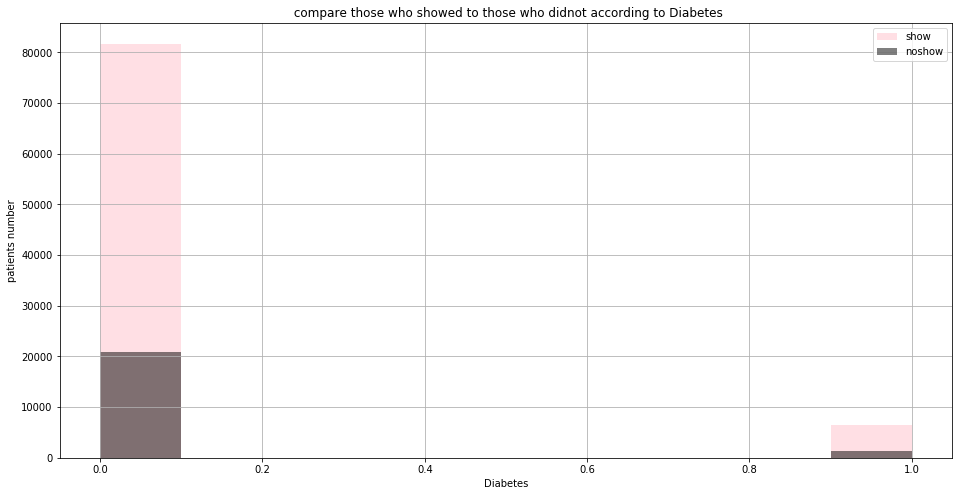

In [85]:
import matplotlib.pyplot as plt  # Import the matplotlib library
#compare those who showed to those who didnot according to Diabetes

plt.figure(figsize=(16, 8))
df.Diabetes[show].hist(alpha=0.5,color='pink',label='show')
df.Diabetes[noshow].hist(alpha=0.5,color='black',label='noshow')
plt.legend();
plt.title(' compare those who showed to those who didnot according to Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('patients number')

Diabetes is negligible

Text(0,0.5,'patients number')

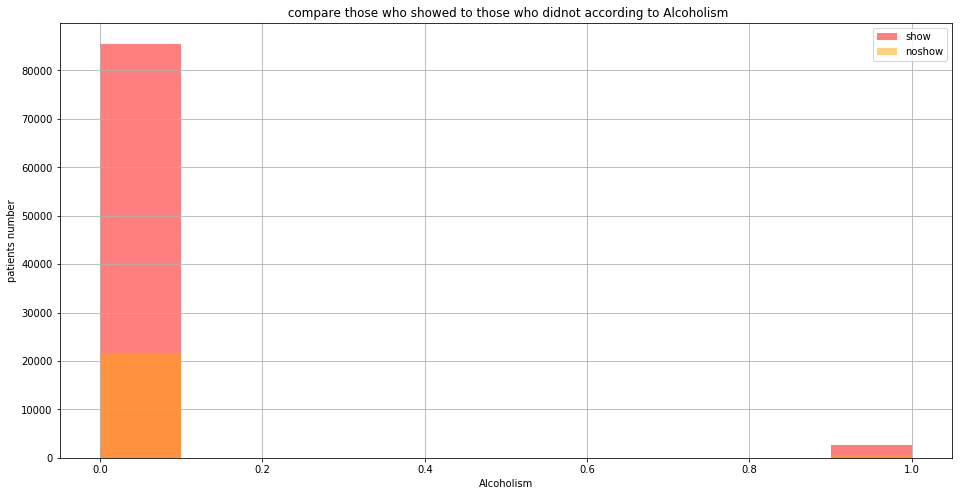

In [86]:
import matplotlib.pyplot as plt  # Import the matplotlib library
#compare those who showed to those who didnot according to Alcoholism

plt.figure(figsize=(16, 8))
df.Alcoholism[show].hist(alpha=0.5,color='red',label='show')
df.Alcoholism[noshow].hist(alpha=0.5,color='orange',label='noshow')
plt.legend();
plt.title(' compare those who showed to those who didnot according to Alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('patients number')

Alcoholism is negligible

Text(0,0.5,'patients number')

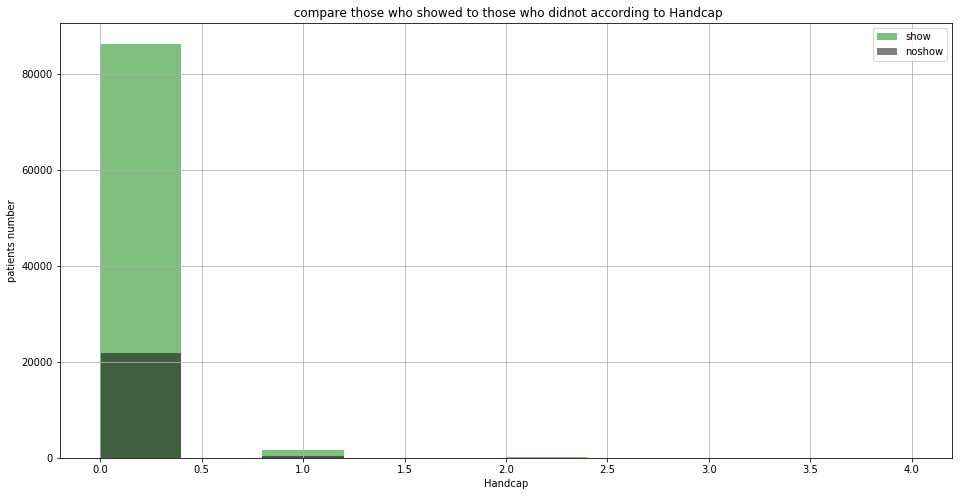

In [88]:
import matplotlib.pyplot as plt  # Import the matplotlib library
#compare those who showed to those who didnot according to Handcap

plt.figure(figsize=(16, 8))
df.Handcap[show].hist(alpha=0.5,color='green',label='show')
df.Handcap[noshow].hist(alpha=0.5,color='black',label='noshow')
plt.legend();
plt.title(' compare those who showed to those who didnot according to Handcap')
plt.xlabel('Handcap')
plt.ylabel('patients number')

Handcap is negligible

Text(0,0.5,'patients number')

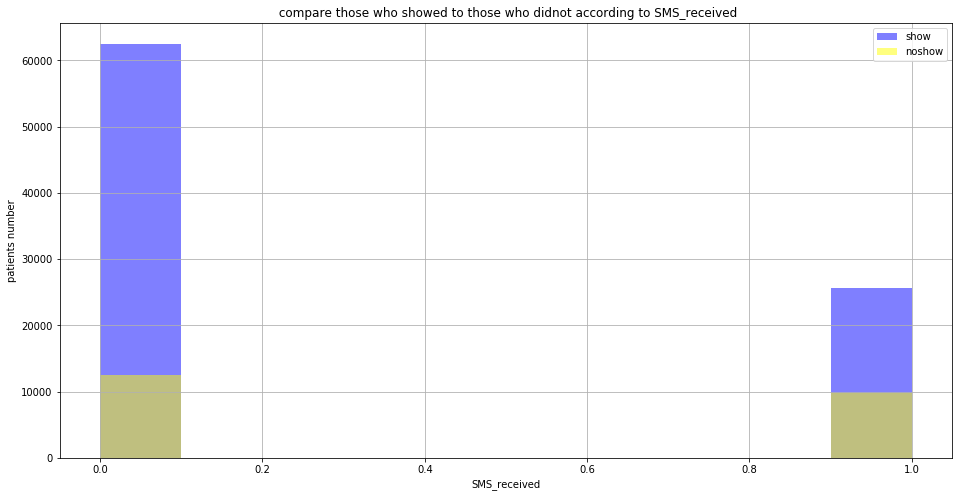

In [90]:
import matplotlib.pyplot as plt  # Import the matplotlib library
#compare those who showed to those who didnot according to SMS_received

plt.figure(figsize=(16, 8))
df.SMS_received[show].hist(alpha=0.5,color='blue',label='show')
df.SMS_received[noshow].hist(alpha=0.5,color='yellow',label='noshow')
plt.legend();
plt.title(' compare those who showed to those who didnot according to SMS_received')
plt.xlabel('SMS_received')
plt.ylabel('patients number')

Text(0,0.5,'patients number')

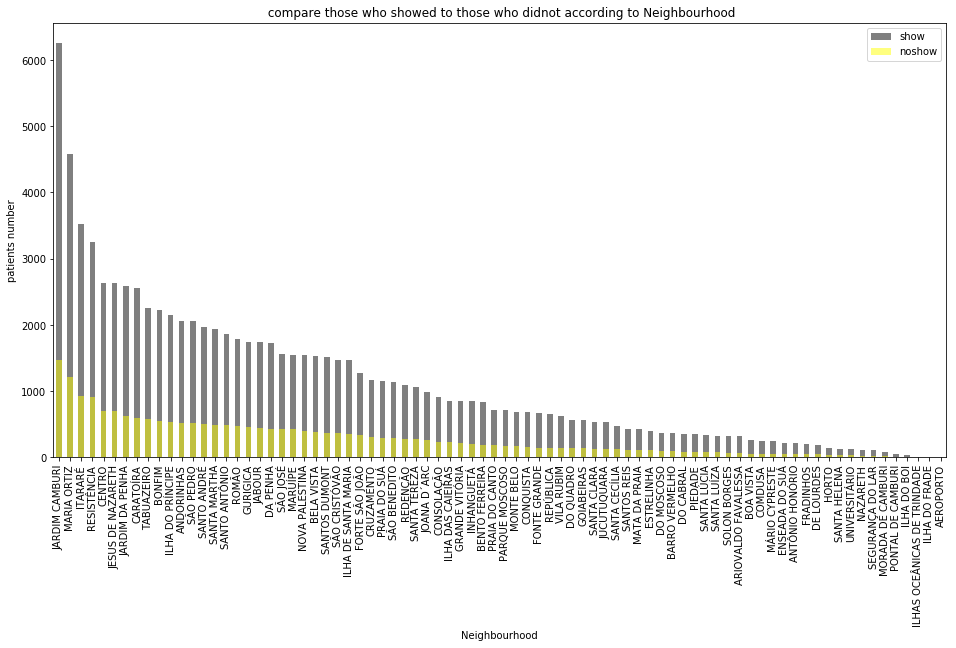

In [94]:
import matplotlib.pyplot as plt  # Import the matplotlib library
#compare those who showed to those who didnot according to Neighbourhood

plt.figure(figsize=(16, 8))
df.Neighbourhood[show].value_counts().plot(kind='bar',alpha=0.5,color='black',label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar',alpha=0.5,color='yellow',label='noshow')
plt.legend();
plt.title(' compare those who showed to those who didnot according to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('patients number')

In [ ]:
import matplotlib.pyplot as plt  # Import the matplotlib library
#compare those who showed to those who didnot according to SMS_received

plt.figure(figsize=(16, 8))
df.SMS_received[show].hist(alpha=0.5,color='blue',label='show')
df.SMS_received[noshow].hist(alpha=0.5,color='yellow',label='noshow')
plt.legend();
plt.title(' compare those who showed to those who didnot according to SMS_received')
plt.xlabel('SMS_received')
plt.ylabel('patients number')

I can assert that there is a significant correlation between the patients' choice of neighborhood and their attendance at the clinic.

Text(0,0.5,'patients number')

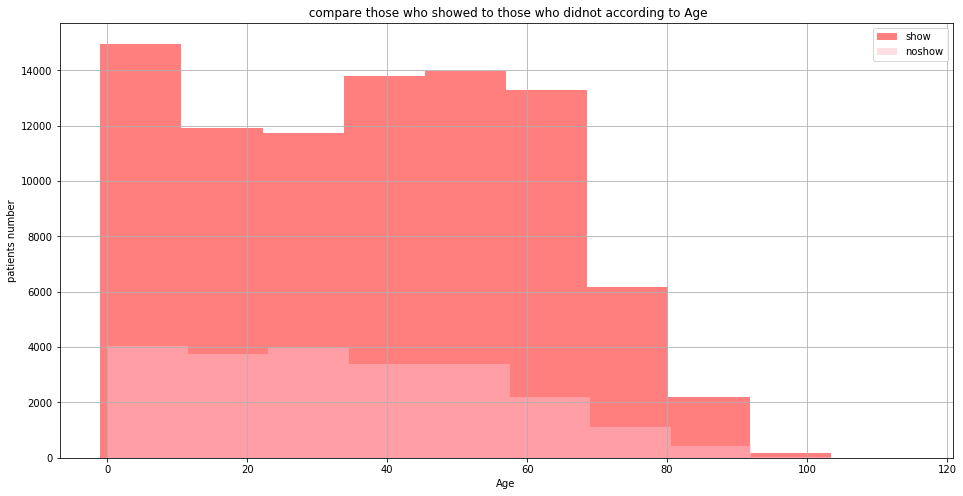

In [92]:
import matplotlib.pyplot as plt  # Import the matplotlib library
#compare those who showed to those who didnot according to Age
plt.figure(figsize=(16, 8))
df.Age[show].hist(alpha=0.5,color='red',label='show')
df.Age[noshow].hist(alpha=0.5,color='pink',label='noshow')
plt.legend();
plt.title(' compare those who showed to those who didnot according to Age')
plt.xlabel('Age')
plt.ylabel('patients number')


"Patients between the ages of 0 to 10 exhibited a higher appointment rate compared to all other age groups. Appointment rates tend to decrease as patients grow older.

<a id='conclusions'></a>
## Conclusions
n conclusion, it is evident that the neighborhood plays a significant role in patients showing up at the clinic. Age also plays a crucial role, with the 0-10 age group showing the highest attendance, followed by the 35-70 age group. Surprisingly, a larger number of patients attended appointments without receiving an SMS reminder.These findings highlight the complex interplay of factors affecting patient attendance and suggest that more research is needed to explore the nuances of this relationship.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0